In [95]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl  
import time  

import win32com.client
from pywintypes import com_error


In [96]:
df = pd.read_csv("Student_data_2.csv")
df.head()

,Name,Roll No.,Gender,College Code,College Name,Subject 1,Subject 2,Subject 3,Subject 4,Subject 5,Attendace
0,Yasho,17055,M,4095,I2IT,8.11,7.68,7.11,7.43,8.18,98
1,Piyush,17056,M,4095,I2IT,6.48,5.90,4.15,4.29,4.96,83
2,Aayush,17057,M,4095,I2IT,8.41,8.24,7.52,8.25,7.75,76
3,Pratik,17058,M,4095,I2IT,7.33,6.83,6.33,6.79,6.89,60


In [97]:
gender = list(df["Gender"])
rollNos = list(df["Roll No."])
atten = list(df["Attendace"])
name = list(df["Name"])
for i in range(len(gender)):
    if gender[i] == "Female": 
        gender[i] = "F"
    elif gender[i] == "Male":
        gender[i] = "M"
df["Gender"] = gender
df.set_index("Roll No.", inplace = True)
df.head()

,Name,Gender,College Code,College Name,Subject 1,Subject 2,Subject 3,Subject 4,Subject 5,Attendace
Roll No.,,,,,,,,,,
17055,Yasho,M,4095,I2IT,8.11,7.68,7.11,7.43,8.18,98
17056,Piyush,M,4095,I2IT,6.48,5.90,4.15,4.29,4.96,83
17057,Aayush,M,4095,I2IT,8.41,8.24,7.52,8.25,7.75,76
17058,Pratik,M,4095,I2IT,7.33,6.83,6.33,6.79,6.89,60


In [98]:
subs = np.array(["Subject 1", "Subject 2", "Subject 3", "Subject 4", "Subject 5"])
max_marks = []
avg_marks = []
min_marks = []
for i in range(5):
    max_marks.append(max(df[subs[i]]))
    avg_marks.append(np.mean(df[subs[i]]))
    min_marks.append(min(df[subs[i]]))
s1 = pd.Series(max_marks, index = [subs])
s2 = pd.Series(avg_marks, index = [subs])
s3 = pd.Series(min_marks, index = [subs])

analysis = pd.DataFrame([s1, s2, s3])
analysis = analysis.T
analysis.rename(columns={0:"Max Marks", 1:"Average Marks", 2:"Minimum Marks"}, inplace = True)
analysis

,Max Marks,Average Marks,Minimum Marks
Subject 1,8.41,7.5825,6.48
Subject 2,8.24,7.1625,5.90
Subject 3,7.52,6.2775,4.15
Subject 4,8.25,6.6900,4.29
Subject 5,8.18,6.9450,4.96


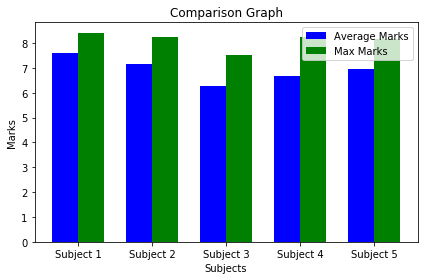

In [99]:
n_groups = 5
data = [avg_marks, max_marks]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35

col_1 = plt.bar(index, data[0], bar_width, color='b', label='Average Marks')

col_2 = plt.bar(index + bar_width, data[1], bar_width, color='g', label='Max Marks')

plt.xlabel('Subjects')
plt.ylabel('Marks')
plt.title('Comparison Graph')
plt.xticks(index + bar_width/2 , subs)
plt.legend()

plt.tight_layout()
plt.show()

In [100]:
df2 = df
df = df.drop(['College Name', 'Gender', "Name", "College Code", "Attendace"], axis=1)
df.head()

,Subject 1,Subject 2,Subject 3,Subject 4,Subject 5
Roll No.,,,,,
17055,8.11,7.68,7.11,7.43,8.18
17056,6.48,5.90,4.15,4.29,4.96
17057,8.41,8.24,7.52,8.25,7.75
17058,7.33,6.83,6.33,6.79,6.89


In [101]:
rows = []
stud = []
for i in range(5):
    rows.append(list(df[subs[i]]))
for i in range(len(rollNos)):
    for j in range(5):
        stud.append(rows[j][i])
def grouper(list, n):
    for i in range(0, len(list), n):
        yield list[i:i+n]
stud = list(grouper(stud, 5))
stud[0]

[8.11, 7.68, 7.11, 7.43, 8.18]

In [102]:
def save_plots(stud1, fileName, i):
    X = np.arange(5)
    fig = plt.figure(figsize=(8,4))
    ax = fig.add_axes([0,0,1,1])
    ax.bar(X + 0.00, avg_marks, color = 'b', width = 0.25)
    ax.bar(X + 0.25, stud1, color = 'r', width = 0.25)
    ax.bar(X + 0.50, max_marks, color = 'g', width = 0.25)
    plt.title("Analysis of student" + str(i+1))
    plt.ylabel("Grade Points")
    plt.xlabel("Subjects")
    plt.xticks(X + 0.25, subs)
    ax.legend(labels=['Avg Marks', 'Student Marks', 'Max Marks'])
    plt.savefig("Plots\\" + fileName, dpi = 150)
    plt.tight_layout()

In [103]:
def report_card(stud, mim, mam, avm, subs):
    s1 = pd.Series(mim, index = subs)
    s2 = pd.Series(mam, index = subs)
    s3 = pd.Series(stud, index = subs)
    s4 = pd.Series(avm, index = subs)
    stud.append(sum(stud)/5)
    grades = []
    for i in range(len(stud)):
        if stud[i] >= 9:
            grades.append("O")
        elif 9 > stud[i] >= 8:
            grades.append("A")
        elif 8 > stud[i] >= 7:
            grades.append("B")
        elif 7 > stud[i] >= 6:
            grades.append("C")
        elif 6 > stud[i] >= 5:
            grades.append("D")
        elif 5 > stud[i] >= 4:
            grades.append("P")
        else:
            grades.append("F")
    result1 = pd.DataFrame((s4, s2, s3), index = ["Avg", "Max", "Your"])
    result1 = result1.T
    total = sum(list(result1["Your"]))
    result1 = result1.append({"Avg" : sum(result1["Avg"]), "Max" : sum(result1["Max"]), "Your" : sum(result1["Your"])}, ignore_index = True)
    result1["Subjects"] = ['Maths', 'Physics', 'Chemistry', 'Computer', 'English', "Total"]
    result1["Grades"] = grades
    result1.set_index("Subjects", inplace = True)
    #result1.to_csv('file1.csv',index=True)
    return result1

In [104]:
x = list(df2.iloc[0])
x = x[1:4]
x

['M', 4095, 'I2IT']

In [105]:
def final_report(fileName2, i, name):
    x = list(df2.iloc[0])
    x = x[1:4]
    mks = list(result1["Your"])[-1]
    percentage = (mks/50)*100

    wb = openpyxl.load_workbook("Excels\\"+fileName2)  
    sheet = wb.active  

    sheet['A1'] = "College"  
    sheet['A3'] = "College"  
    sheet['A4'] = "Gender"
    sheet['A5'] = "Roll"
    sheet['A6'] = "Name"
    sheet['B1'] = "Name"
    sheet['B3'] = "Code"
    sheet['C4'] = x[0]
    sheet['B5'] = "No."
    sheet['C1'] = x[2]
    sheet['C3'] = x[1]
    sheet['C5'] = i+1
    sheet['C6'] = name
    sheet['A13'] = "Percentage"
    sheet['B13'] = percentage

    img = openpyxl.drawing.image.Image('plot_1.png')
    img.height = 300
    img.width = 450
    sheet.add_image(img, "A15")
    wb.save("Excels\\"+fileName2)

In [106]:
def convert(WB_PATH, PATH_TO_PDF):
    excel = win32com.client.Dispatch("Excel.Application")

    excel.Visible = False

    try:
        #print('Start conversion to PDF')

        # Open
        wb = excel.Workbooks.Open(WB_PATH)

        # Specify the sheet you want to save by index. 1 is the first (leftmost) sheet.
        ws_index_list = [1]
        wb.WorkSheets(ws_index_list).Select()

        # Save
        wb.ActiveSheet.ExportAsFixedFormat(0, PATH_TO_PDF)
    except com_error as e:
        print('failed.')
    finally:
        wb.Close()
        excel.Quit()

C:\Users\Piyush\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


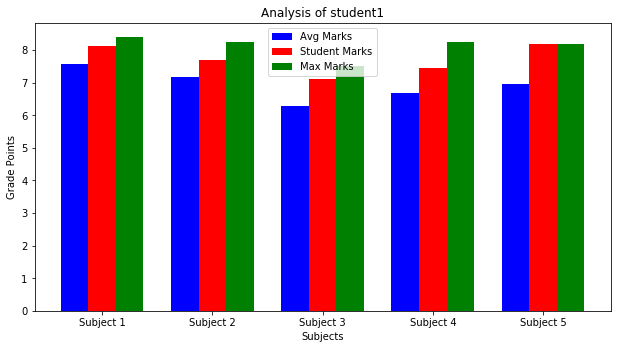

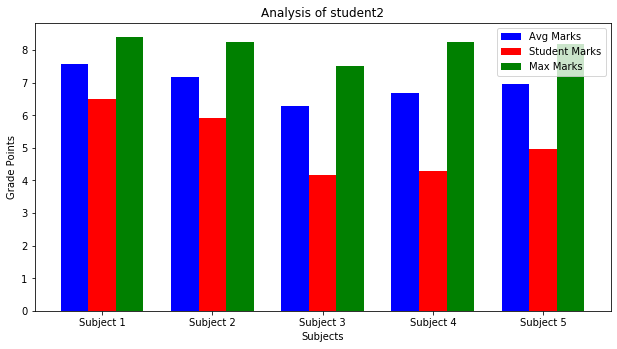

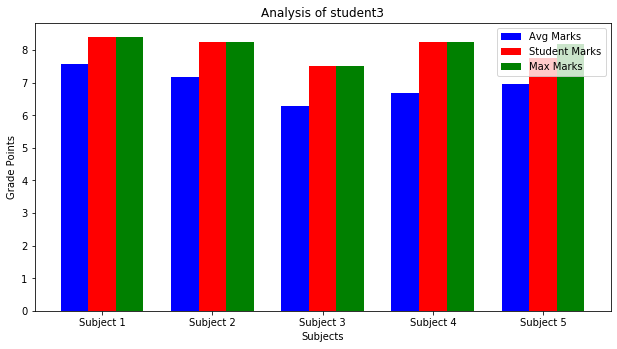

In [107]:
for i in range(len(rollNos)):
    stud1 = []
    for j in range(5):
        stud1.append(stud[i][j])
    if atten[i] >= 75:
        fileName = "stud" + str(i+1) + ".png"
        save_plots(stud1, fileName, i)
        result1 = report_card(stud1, min_marks, max_marks, avg_marks, subs)
        fileName2 = "stud" + str(i+1) + ".xlsx"
        result1.to_excel("Excels\\"+fileName2, sheet_name = "Sheet_1", startrow = 6)
        final_report(fileName2, i, name[i])
        # Path to original excel file
        WB_PATH = r'C:\Users\Piyush\Desktop\IoT+Schneider\My_Projects\Hackathon\donno\Excels\\'+fileName2
        # PDF path when saving
        PATH_TO_PDF = r'C:\Users\Piyush\Desktop\IoT+Schneider\My_Projects\Hackathon\donno\Final results\\'+fileName2[:-4]+'pdf'
        convert(WB_PATH, PATH_TO_PDF)


In [122]:
total_number = len(rollNos)
mcount, fcount, ligit = 0, 0, 0
for i in range(len(gender)):
    if gender[i] == 'M':
        mcount += 1
    elif gender[i] == 'F':
        fcount += 1
    if atten[i] >= 75:
        ligit += 1

In [123]:
print("Total number of students appeared: ", total_number)
print("Total number of Boys appeared: ", mcount)
print("Total number of Girls appeared: ", fcount)
print("Total number of student eligible for result: ", ligit)


Total number of students appeared:  4
Total number of Boys appeared:  4
Total number of Girls appeared:  0
Total number of student eligible for result:  3
